# Principal Component Analysis
## Group: ALT



### Exercise 1.1:  PCA: 2-dimensional Toy Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data2d = np.loadtxt("pca-data-2d.dat")

In [3]:
centered_data2d = (data2d - np.mean(data2d,axis=0)).T
centered_data2d.T

array([[ 0.49, -0.69],
       [-1.21,  1.31],
       [ 0.99, -0.39],
       [ 0.29, -0.09],
       [ 1.09, -1.29],
       [ 0.79, -0.49],
       [-0.31, -0.19],
       [-0.81,  0.81],
       [-0.31,  0.31],
       [-1.01,  0.71]])

In [4]:
def principal_components(data):
    centered_data = (data - np.mean(data,axis=0)).T
    cov_matrix = np.cov(centered_data)
    eigenval, eigenvec = np.linalg.eig(cov_matrix)
    eigenvec = eigenvec.T

    idx = eigenval.argsort()[::-1]
    sorted_eigenvals = eigenval[idx]
    sorted_eigenvecs = eigenvec[idx,:]
    return sorted_eigenvals,sorted_eigenvecs

In [5]:
cov_matrix_2d = np.cov(centered_data2d)
cov_matrix_2d

array([[ 0.71655556, -0.61544444],
       [-0.61544444,  0.61655556]])

In [6]:
eigenval2d, M_eigenvec2d = np.linalg.eig(cov_matrix_2d)
M_eigenvec2d = M_eigenvec2d.T

idx = eigenval2d.argsort()[::-1]
eigenvals = eigenval2d[idx]
eigenvecs = M_eigenvec2d[idx,:]
eigenvecs

array([[ 0.73517866, -0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

In [7]:
print("The pricipal components are e1 = {} and e2 = {}".format(eigenvecs[0],eigenvecs[1]))
print("\nThe eigenvalues are lambda1 = {} and lambda2 = {}".format(eigenvals[0],eigenvals[1]))

The pricipal components are e1 = [ 0.73517866 -0.6778734 ] and e2 = [0.6778734  0.73517866]

The eigenvalues are lambda1 = 1.2840277121727839 and lambda2 = 0.04908339893832725


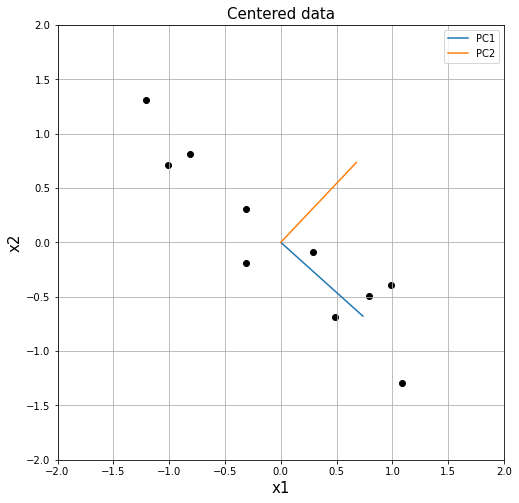

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(centered_data2d[0],centered_data2d[1], color = "black")
plt.plot([0, eigenvecs[0,0]], [0, eigenvecs[0,1]], label = "PC1")
plt.plot([0, eigenvecs[1,0]], [0, eigenvecs[1,1]], label = "PC2")
plt.xlabel("x1", fontsize = 15)
plt.ylabel("x2", fontsize = 15)
plt.title("Centered data", fontsize = 15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.show()

In [9]:
#transformed data into the coordinate system of the 2PCS
data2d_eigenspace = np.dot(eigenvecs,centered_data2d)
data2d_eigenspace.T

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

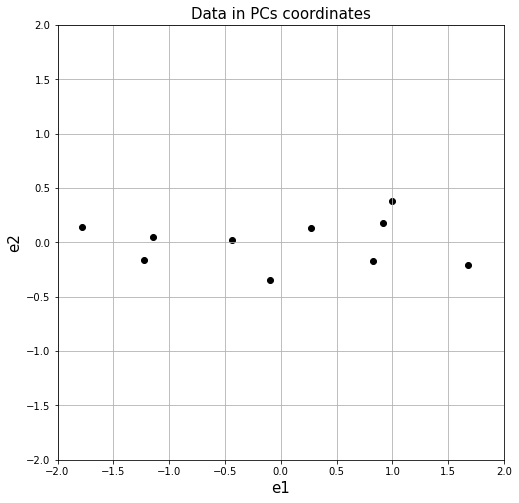

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(data2d_eigenspace[0],data2d_eigenspace[1], color = "black")
plt.xlabel("e1", fontsize = 15)
plt.ylabel("e2", fontsize = 15)
plt.title("Data in PCs coordinates", fontsize = 15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()

In [11]:
data2d_1PC = np.vstack((data2d_eigenspace[0],np.zeros(10)))
data2d_1PC.T

array([[ 0.82797019,  0.        ],
       [-1.77758033,  0.        ],
       [ 0.99219749,  0.        ],
       [ 0.27421042,  0.        ],
       [ 1.67580142,  0.        ],
       [ 0.9129491 ,  0.        ],
       [-0.09910944,  0.        ],
       [-1.14457216,  0.        ],
       [-0.43804614,  0.        ],
       [-1.22382056,  0.        ]])

In [12]:
reconstruction_1PC_2d = np.dot(data2d_1PC.T,eigenvecs)
reconstruction_1PC_2d

array([[ 0.60870601, -0.56125896],
       [-1.30683911,  1.20497442],
       [ 0.72944242, -0.67258429],
       [ 0.20159364, -0.18587995],
       [ 1.23201343, -1.1359812 ],
       [ 0.67118069, -0.61886391],
       [-0.07286314,  0.06718365],
       [-0.84146502,  0.77587502],
       [-0.32204217,  0.29693982],
       [-0.89972675,  0.8295954 ]])

In [13]:
data2d_2PC = np.vstack((np.zeros(10),data2d_eigenspace[1]))
reconstruction_2PC_2d = np.dot(data2d_2PC.T,eigenvecs)

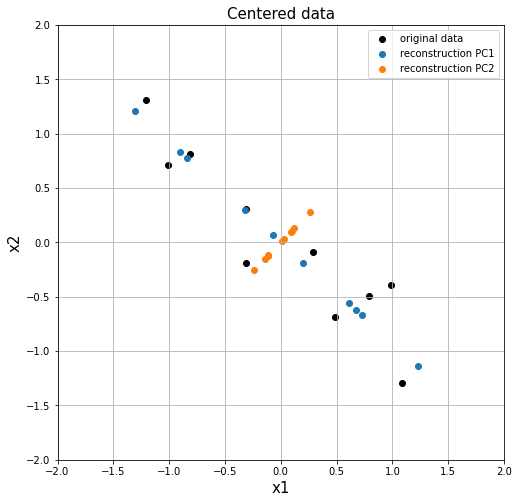

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(centered_data2d[0],centered_data2d[1], color = "black", label = "original data")
plt.scatter(reconstruction_1PC_2d.T[0],reconstruction_1PC_2d.T[1], label = "reconstruction PC1")
plt.scatter(reconstruction_2PC_2d.T[0],reconstruction_2PC_2d.T[1], label = "reconstruction PC2")
plt.xlabel("x1", fontsize = 15)
plt.ylabel("x2", fontsize = 15)
plt.title("Centered data", fontsize = 15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.show()

## Exercise 1.2:  PCA: 3-dimensional Toy Data

In [15]:
data3d_pandas = pd.read_csv('pca-data-3d.txt', sep=",", header=0)
data3d = pd.DataFrame(data3d_pandas).to_numpy()
centered_data3d = (data3d - np.mean(data3d,axis=0)).T

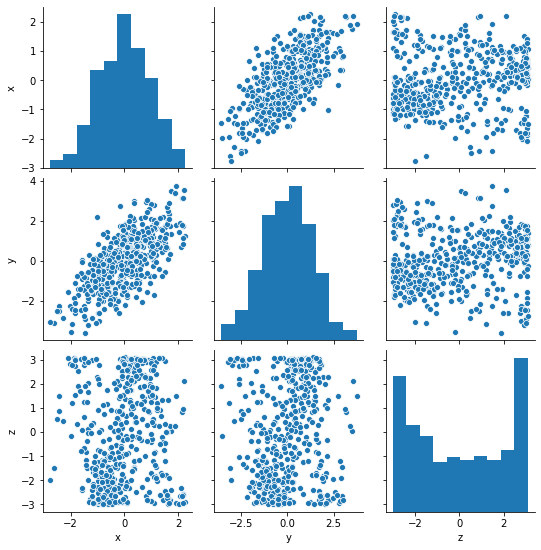

In [16]:
sns.pairplot(pd.DataFrame(centered_data3d.T, columns = ['x','y','z']))
plt.show()

In [17]:
eigenvals_3d, eigenvecs_3d = principal_components(data3d)

In [18]:
eigenvecs_3d

array([[ 0.12121678,  0.1844957 ,  0.9753296 ],
       [ 0.51120047,  0.83065188, -0.22066159],
       [-0.85087048,  0.52533684,  0.00637466]])

In [19]:
centered_data3d

array([[-0.23781794, -0.02320852,  0.78870474, ..., -1.47638869,
         0.75531742,  0.86035587],
       [ 0.13161615, -0.47205661,  2.96299299, ..., -3.57897783,
         1.02239699,  1.41898832],
       [-0.15166948, -0.93101129, -2.66632124, ...,  1.89554422,
         2.27175325,  0.87574383]])

In [20]:
def data_to_eigenspace(eigenvectors, centered_data):
    """
    Takes matrix of eigenvectors, where each eigenvector is a row and centered_data, 
    where each row is one dimension and the columns are different observations
    :return: numpy array with data in the principal components coordinates
    """
    return np.dot(eigenvectors,centered_data)

In [21]:
data3d_eigenspace = data_to_eigenspace(eigenvecs_3d,centered_data3d)

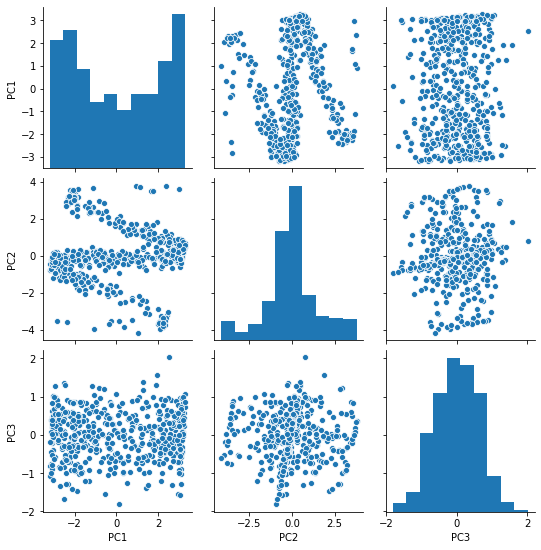

In [22]:
sns.pairplot(pd.DataFrame(data3d_eigenspace.T, columns = ['PC1','PC2','PC3']))
plt.show()

In [23]:
data3d_1PC = np.vstack((data3d_eigenspace[0],np.zeros((2,np.shape(data3d_eigenspace)[1]))))
reconstruction_1PC_3d = np.dot(data3d_1PC.T,eigenvecs_3d)

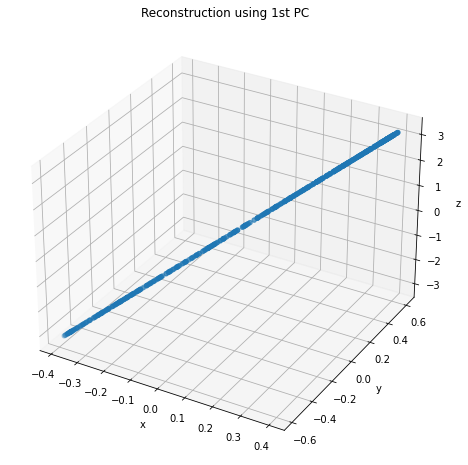

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction_1PC_3d.T[0],reconstruction_1PC_3d.T[1],reconstruction_1PC_3d.T[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Reconstruction using 1st PC")
plt.show()

In [25]:
data3d_2PC = np.vstack((data3d_eigenspace[0:2],np.zeros(np.shape(data3d_eigenspace)[1])))
reconstruction_2PC_3d = np.dot(data3d_2PC.T,eigenvecs_3d)

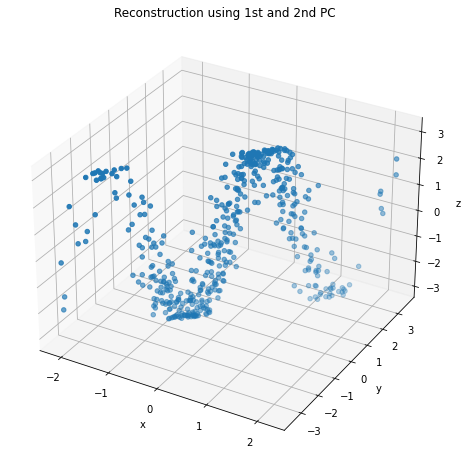

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction_2PC_3d.T[0],reconstruction_2PC_3d.T[1],reconstruction_2PC_3d.T[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Reconstruction using 1st and 2nd PC")
plt.show()

In [27]:
reconstruction_3PC_3d = np.dot(data3d_eigenspace.T,eigenvecs_3d)

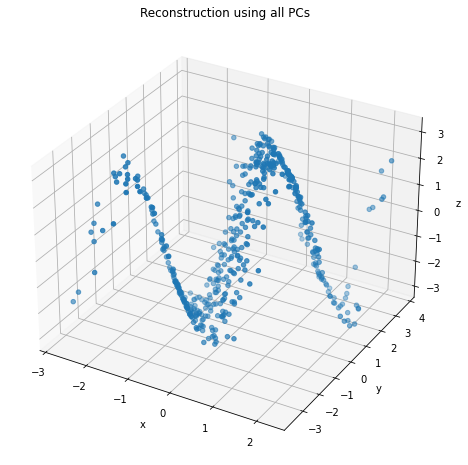

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction_3PC_3d.T[0],reconstruction_3PC_3d.T[1],reconstruction_3PC_3d.T[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Reconstruction using all PCs")
plt.show()

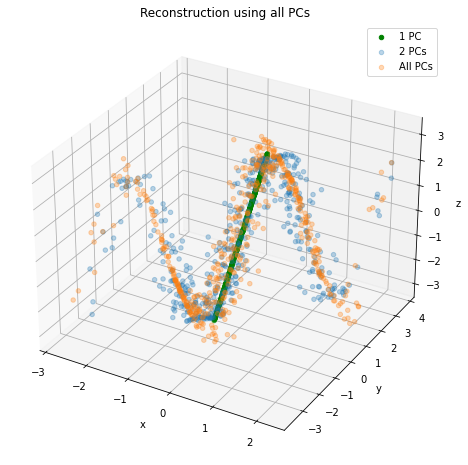

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction_1PC_3d.T[0],reconstruction_1PC_3d.T[1],reconstruction_1PC_3d.T[2], label = "1 PC",color="green")
ax.scatter(reconstruction_2PC_3d.T[0],reconstruction_2PC_3d.T[1],reconstruction_2PC_3d.T[2], label = "2 PCs",alpha=0.3)
ax.scatter(reconstruction_3PC_3d.T[0],reconstruction_3PC_3d.T[1],reconstruction_3PC_3d.T[2], label = "All PCs",alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Reconstruction using all PCs")
plt.legend()
plt.show()

## Exercise 1.3:  Projections of a dynamical system

In [30]:
data_dyn = pd.read_csv('expDat.txt', sep=",", header=0)
data_dyn = pd.DataFrame(data_dyn).to_numpy().T[1:].T
centered_dyn = (data_dyn - np.mean(data_dyn,axis=0)).T

In [31]:
#first 20 principal components of the dataset
eigenvals_data,sorted_PC_data = principal_components(data_dyn)

In [32]:
def data_to_eigenspace(eigenvectors, centered_data):
    """
    Takes matrix of eigenvectors, where each eigenvector is a row and centered_data, 
    where each row is one dimension and the columns are different observations
    :return: numpy array with data in the principal components coordinates
    """
    return np.dot(eigenvectors,centered_data)

In [33]:
project_2PCs = data_to_eigenspace(sorted_PC_data[0:2],centered_dyn)

<ipython-input-34-258a2933560f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].xaxis.set_ticklabels([0.0,0.2,0.4,0.6,0.8,1.0])


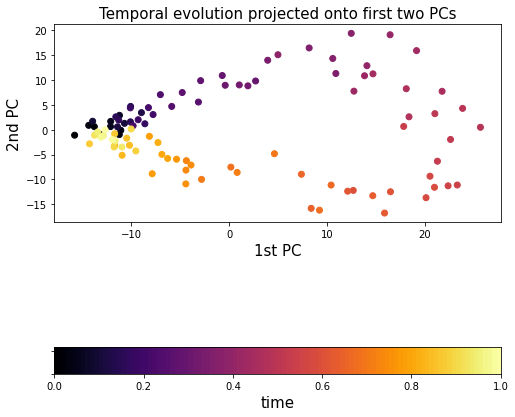

In [34]:
times = np.linspace(0, 1, 100)
times_2d = np.vstack((times,times))
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 8)

axs[0].scatter(project_2PCs[0],project_2PCs[1], c = times, cmap="inferno")
axs[0].set_xlabel("1st PC", fontsize = 15)
axs[0].set_ylabel("2nd PC", fontsize = 15)
axs[0].set_title("Temporal evolution projected onto first two PCs", fontsize = 15)

axs[1].imshow(times_2d, cmap = "inferno", aspect = 2,  extent=[0, 100, -10, -7])
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel("time", fontsize=15)
axs[1].xaxis.set_ticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

plt.show()

<ipython-input-35-5df08aeb18e0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].xaxis.set_ticklabels([0.0,0.2,0.4,0.6,0.8,1.0])


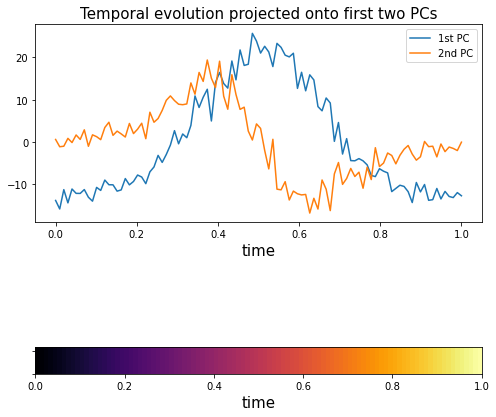

In [35]:
project_1stPC = data_to_eigenspace(sorted_PC_data[0],centered_dyn)
project_2ndPC = data_to_eigenspace(sorted_PC_data[1],centered_dyn)

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 8)
axs[0].plot(times,project_1stPC, label = "1st PC")
axs[0].plot(times, project_2ndPC, label = "2nd PC")
axs[0].set_xlabel("time", fontsize = 15)
axs[0].set_title("Temporal evolution projected onto first two PCs", fontsize = 15)
axs[0].legend()

axs[1].imshow(times_2d, cmap = "inferno", aspect = 2,  extent=[0, 100, -10, -7])
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel("time", fontsize=15)
axs[1].xaxis.set_ticklabels([0.0,0.2,0.4,0.6,0.8,1.0])

plt.show()

In [36]:
shuffle = np.random.randint(low=0,high = 100,size = (100,20))
new_data = np.zeros_like(data_dyn)
for i in range(20):
    new_data[:,i] = data_dyn[shuffle[:,i]][:,i]
    
centered_new_data_1 = (new_data - np.mean(new_data,axis=0)).T

In [37]:
cov_original = np.cov(centered_dyn)
cov_new_1 = np.cov(centered_new_data_1)

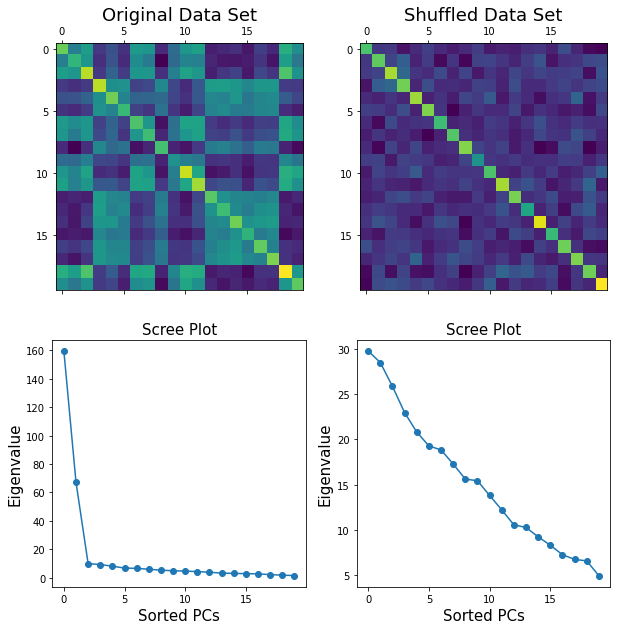

In [38]:
eigenvals_new_data,sorted_PC_new_data = principal_components(centered_new_data_1.T)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

axs[0,0].matshow(cov_original)
axs[0,0].set_title("Original Data Set", fontsize = 18)
axs[0,1].matshow(cov_new_1)
axs[0,1].set_title("Shuffled Data Set", fontsize = 18)

axs[1,0].plot(np.arange(20),eigenvals_data,'-o')
axs[1,0].set_xlabel("Sorted PCs", fontsize = 15)
axs[1,0].set_ylabel("Eigenvalue", fontsize = 15)
axs[1,0].set_title("Scree Plot", fontsize = 15)

axs[1,1].plot(np.arange(20),eigenvals_new_data,'-o')
axs[1,1].set_xlabel("Sorted PCs", fontsize = 15)
axs[1,1].set_ylabel("Eigenvalue", fontsize = 15)
axs[1,1].set_title("Scree Plot", fontsize = 15);


__d)__
Shuffling takes out the temporal structure of the data, thus the shuffled data set loses the correlations between the other dimensions. In the scree plot we see that the eigenvalues are now close to each other and smaller in magnitude, because there's more randomness in the data. 

__e)__
Shuffling changes the correlations between the variables, but it doesn't change the eigenvalues and vectors of the covariance matrix, which means that the principal components of the data stay the same.



### Exercise 4

In [39]:
import zipfile
with zipfile.ZipFile("imgpca.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [40]:
import glob
from scipy import ndimage
import cv2
import random

nature_color = [cv2.imread(x) for x in glob.glob('imgpca/n*.jpg')]
nature = [cv2.cvtColor(nature_color[i], cv2.COLOR_BGR2GRAY) for i in range(len(nature_color))]

buildings_color = [cv2.imread(x) for x in glob.glob('imgpca/b*.jpg')]
buildings = [cv2.cvtColor(buildings_color[i], cv2.COLOR_BGR2GRAY) for i in range(len(buildings_color))]


In [41]:
def sample_patches(images,n_patches = 5000, pixels = 16):
    patches = np.zeros((n_patches,pixels,pixels))
    for i in range(n_patches):
        image = random.choice(images)
        size_x, size_y = image.shape[0:2]
        x_patch = np.random.randint(0,size_x-pixels)
        y_patch = np.random.randint(0,size_y-pixels)
        patches[i] = image[x_patch:x_patch+pixels,y_patch:y_patch + pixels]
    return patches

In [42]:
def plot_images(images,rows,columns,title):
    fig, axs = plt.subplots(rows, columns)
    fig.set_size_inches(10, 15)
    count=0
    for r in range(rows):
        for c in range(columns):
            axs[r,c].imshow(images[count])
            axs[r,c].yaxis.set_ticklabels([])
            axs[r,c].xaxis.set_ticklabels([])
            count += 1
            
    fig.suptitle(title, fontsize=15)
            
    return axs
    

In [43]:
nature_patches = sample_patches(nature).reshape((5000,256))
buildings_patches = sample_patches(buildings).reshape((5000,256))

In [44]:
eigenvals_nature, PCs_nature = principal_components(nature_patches)
eigenvals_buildings, PCs_buildings = principal_components(buildings_patches)

PCs_nature = PCs_nature.reshape((-1,16,16))
PCs_buildings = PCs_buildings.reshape((-1,16,16))


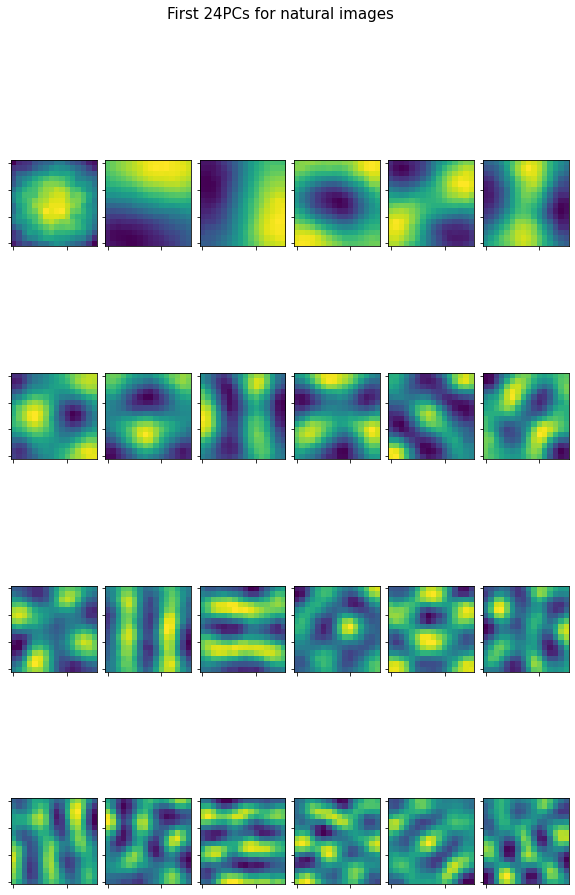

In [45]:
plot_images(PCs_nature[0:24],rows = 4,columns = 6, title = "First 24PCs for natural images")
plt.subplots_adjust(wspace=0.1)
plt.show()

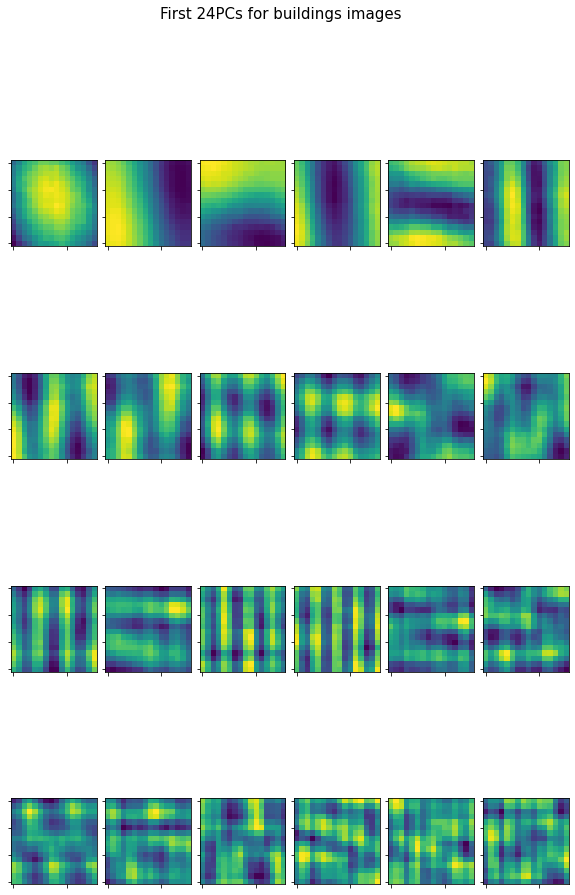

In [46]:
plot_images(PCs_buildings[0:24],rows = 4,columns = 6, title = "First 24PCs for buildings images")
plt.subplots_adjust(wspace=0.1)
plt.show()

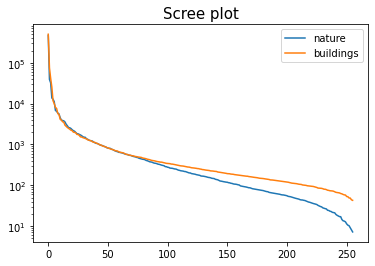

In [47]:
plt.plot(eigenvals_nature, label = "nature")
plt.plot(eigenvals_buildings, label = "buildings")
plt.title("Scree plot", fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()